In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [164]:
iris = load_iris()

In [165]:
features = iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [166]:
X = iris.data
y = iris.target

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [168]:
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
combinations = [
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)"],   # Combination 1
    ["petal length (cm)", "sepal width (cm)","petal width (cm)"],    # Combination 2
    ["sepal length (cm)", "petal width (cm)", "sepal width (cm)"],    # Combination 3
    ["sepal width (cm)", "petal length (cm)","sepal length (cm)"],   # Combination 4
]

def get_data(input_features, output_feature):
    input_indices = [feature_names.index(f) for f in input_features]
    output_index = feature_names.index(output_feature)
    X = data[:, input_indices]  # Input features
    y = data[:, output_index].reshape(-1, 1)  # Output feature
    return X, y

# Get the data for the first combination
input_features = combinations[0][:2] 
output_feature = combinations[0][2]
X, y = get_data(input_features, output_feature)
X_train_sepal_lw, X_test_sepal_lw, y_train_petal_l, y_test_petal_l = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train_sepal_lw.shape, X_test_sepal_lw.shape, y_train_petal_l.shape, y_test_petal_l.shape)

# Get the data for the second combination
input_features = combinations[1][:2] 
output_feature = combinations[1][2]
X, y = get_data(input_features, output_feature)
X_train_pl_sw, X_test_pl_sw, y_train_petal_w, y_test_petal_w = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train_pl_sw.shape, X_test_pl_sw.shape, y_train_petal_w.shape, y_test_petal_w.shape)

input_features = combinations[2][:2] 
output_feature = combinations[2][2]

X, y = get_data(input_features, output_feature)
X_train_sl_pw, X_test_sl_pw, y_train_sepal_w, y_test_sepal_w = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train_sl_pw.shape, X_test_sl_pw.shape, y_train_sepal_w.shape, y_test_sepal_w.shape)

input_features = combinations[3][:2]
output_feature = combinations[3][2]
X, y = get_data(input_features, output_feature)
X_train_sw_pl, X_test_sw_pl, y_train_sepal_l, y_test_sepal_l = train_test_split(X, y, test_size=0.1, random_state=42)


(135, 2) (15, 2) (135, 1) (15, 1)
(135, 2) (15, 2) (135, 1) (15, 1)
(135, 2) (15, 2) (135, 1) (15, 1)


In [169]:
import numpy as np

class LinearRegression():
    def __init__(self):
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y, batch_size=32, max_epochs=100, learning_rate=0.01 , patience=3):
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.weights = 0
        self.bias = 0
        best_val_loss = np.inf
        patience_counter = 0

        n_sample,n_feture = X.shape
        # we divide our training data to traning and validation
        split_index = int(0.9 *  n_sample)
        X_train , X_val = X[:split_index] , X[split_index:]
        y_train , y_val = y[:split_index] , y[split_index:]
        
        for epoch in range(max_epochs):
            error = 0
            for i in range(0, X.shape[0], batch_size):
                batch_X = X_train[i:i + batch_size]
                batch_y = y_train[i:i + batch_size]
                y_pred = np.dot(batch_X, self.weights) + self.bias
                error = y_pred - batch_y
                
                batch_loss = np.mean(error**2)
                self.history.append(batch_loss) 

                dw = (2 / batch_size) * np.dot(batch_X.T, (y_pred - batch_y))
                db = (2 / batch_size) * np.sum(y_pred - batch_y)

                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db
              
            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss = np.mean((y_val_pred - y_val)**2)
                
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience = 3
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break    


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def score(self, yt, ypred):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return mse

    def fitL2(self, X, y, batch_size=32, regularization=0, max_epochs=100, learning_rate=0.001):
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.weights = 0
        self.bias = 0

        for epoch in range(max_epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = ((2 / X.shape[0]) * np.dot(X.T, (y_pred - y))) + (2 * regularization * self.weights)
            db = ((2 / X.shape[0]) * np.sum(y_pred - y))

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db


Training model 1 with sepal length and width to predict Petal width

In [170]:
model1 = LinearRegression ()
X_train_sepal_lw = np.nan_to_num(X_train_sepal_lw)
y_train_petal_l = np.nan_to_num(y_train_petal_l)
model1.fit(X_train_sepal_lw, y_train_petal_l, 32, 100)

Early stopping at epoch 93


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


MSE:  67.23957889079944


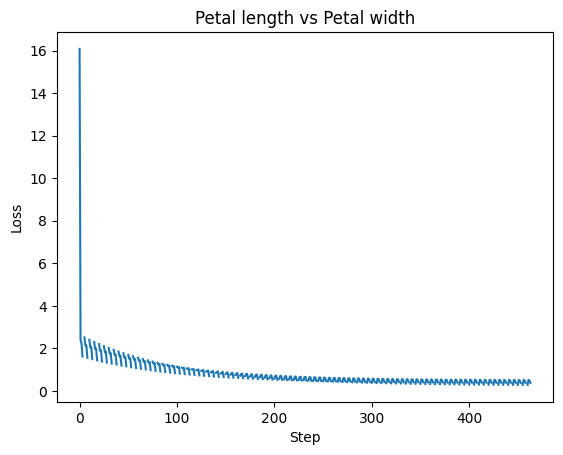

In [171]:
X_test_sepal_lw = np.nan_to_num(X_test_sepal_lw)
pred1 = model1.predict(X_test_sepal_lw)
y_test_sepal_l = np.nan_to_num(y_test_sepal_l)
mse1 = model1.score(y_test_sepal_l, pred1)
print("MSE: ",mse1)

batcherror_1 = model1.history
plt.plot(batcherror_1)
plt.title('Petal length vs Petal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

Training model 2 with Petal length & Sepal width to predict Petal width

In [172]:
model2 = LinearRegression ()
model2.fit(X_train_pl_sw, y_train_petal_w, 32, 100)

Early stopping at epoch 21


MSE:  25.345865990716398


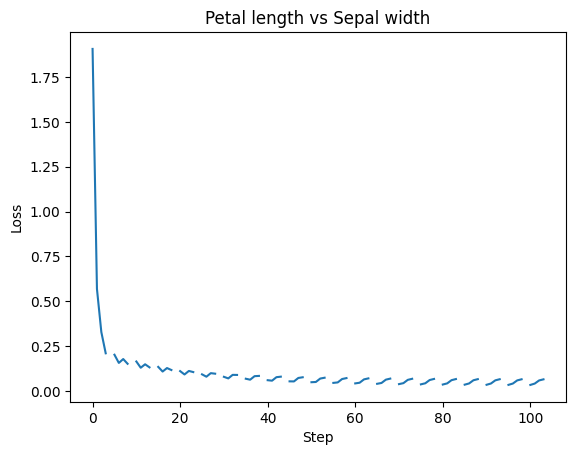

In [173]:
pred2 = model2.predict(X_test_pl_sw)
mse2 = model2.score(y_test_petal_w, pred2)
print("MSE: ",mse2)
batcherror2 = model2.history
plt.plot(batcherror2)
plt.title('Petal length vs Sepal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

Training model 3 with Sepal length & Petal width to predict Sepal width

In [174]:
model3 = LinearRegression ()
X_train_sl_pw = np.nan_to_num(X_train_sl_pw)
y_train_sepal_w = np.nan_to_num(y_train_sepal_w)
model3.fit(X_train_sl_pw, y_train_sepal_w, 32, 100)

39.65391897810217


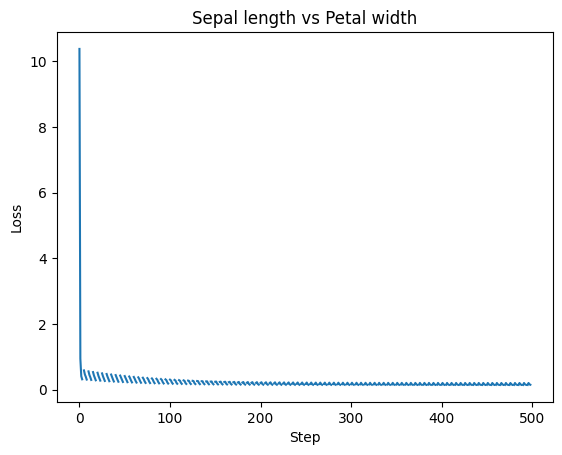

In [175]:
X_test_sl_pw = np.nan_to_num(X_test_sl_pw)
y_test_sepal_w = np.nan_to_num(y_test_sepal_w)
pred3 = model3.predict(X_test_sl_pw)
mse3= model3.score(y_test_sepal_w, pred3)
print(mse3)
batcherror3 = model3.history
plt.plot(batcherror3)
plt.title('Sepal length vs Petal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

Training model 4 with Sepal width & petal length to predict sepal length

In [176]:
X_train_sw_pl = np.nan_to_num(X_train_sw_pl)
X_train_sepal_l = np.nan_to_num(y_train_sepal_l)
model4 = LinearRegression ()
model4.fit(X_train_sw_pl, X_train_sepal_l, 32, 100)

0.13234302086631952


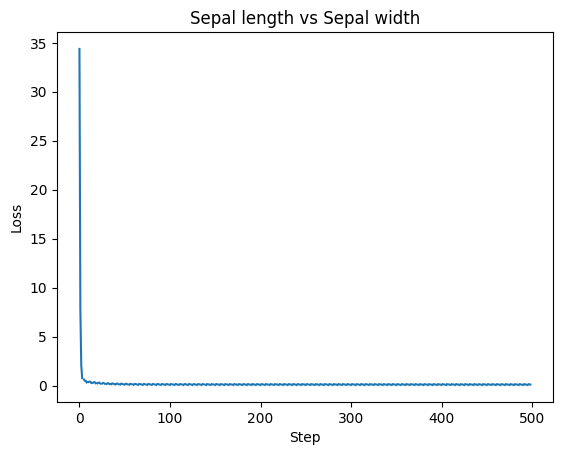

In [177]:
X_test_sw_pl = np.nan_to_num(X_test_sw_pl)
pred4 = model4.predict(X_test_sw_pl)
y_test_sepal_l = np.nan_to_num(y_test_sepal_l)
mse4 = model4.score(y_test_sepal_l, pred4)
print(mse4)
batcherror4 = model4.history
plt.plot(batcherror4)
plt.title('Sepal length vs Sepal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

L2 Regularization

In [178]:
model5 = LinearRegression ()
model5.fitL2(X_train_petallength, X_train_sepalwidth, 100)

In [179]:
pred5 = model5.predict(X_test_petallength)
mse5 = model5.sco(X_test_sepalwidth, pred5)
print(mse5)
plt.plot(X_test_petallength, pred5)
plt.title('Sepal length vs Sepal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'sco'